# **Notas**

Librerias

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# **Dataset**

In [9]:
notas = [3, 19, 10, 15, 14, 12, 9, 8, 11, 12, 11, 12, 13, 11, 14, 16]
df_notas = pd.DataFrame({'Notas': notas})

df_notas


,Notas
0,3
1,19
2,10
3,15
4,14
5,12
6,9
7,8
8,11
9,12


# **Cálculo de medidas para centralizar los datos**

Media , moda y mediana

In [16]:
media=df_notas["Notas"].mean()
mediana=df_notas["Notas"].median()
moda = df_notas['Notas'].mode().values[0]

print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")
    


Media: 11.875
Mediana: 12.0
Moda: 11


Varianza y desviación típica

In [48]:
# para ello vamos a crear un nuevo dataset con dos columnas más 

notas_menos_media = [nota - media for nota in notas]
notas_menos_media_cuadrado = [(nota - media)**2 for nota in notas]

df_notas_2 = pd.DataFrame({'Notas': notas, 'Notas - Media': notas_menos_media, 'Notas - Media^2': notas_menos_media_cuadrado})

df_notas_2


,Notas,Notas - Media,Notas - Media^2
0,3,-8.875,78.765625
1,19,7.125,50.765625
2,10,-1.875,3.515625
3,15,3.125,9.765625
4,14,2.125,4.515625
5,12,0.125,0.015625
6,9,-2.875,8.265625
7,8,-3.875,15.015625
8,11,-0.875,0.765625
9,12,0.125,0.015625


In [60]:
#calulamos la varianza
varianza = np.sum(df_notas_2["Notas - Media^2"])/len(notas)
print("Varianza :" + str(varianza))
desviacion_tip=np.sqrt(varianza)
print("Desviación tipica :" +str(desviacion_tip))


Varianza :12.234375
Desviación tipica :3.4977671449083054


Cuartiles

In [17]:
Q1=df_notas["Notas"].quantile(0.25)
Q2=df_notas["Notas"].quantile(0.5)
Q3 = df_notas['Notas'].quantile(0.75)
Rango_inter=Q1-Q2
print(f"Q1: {Q1}")
print(f"Q2 (Mediana): {Q2}")
print(f"Q3: {Q3}")

Q1: 10.75
Q2 (Mediana): 12.0
Q3: 14.0


Box plot

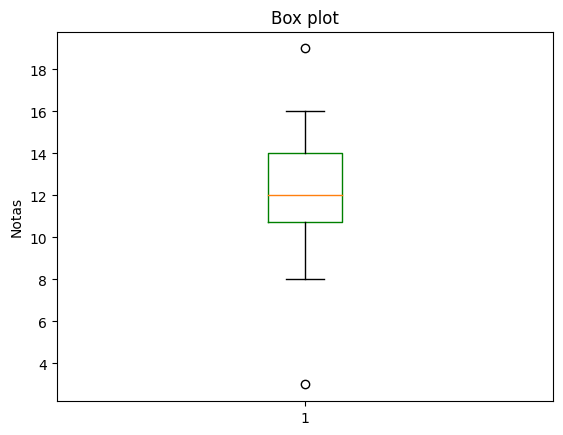

In [39]:
notas = [3, 19, 10, 15, 14, 12, 9, 8, 11, 12, 11, 12, 13, 11, 14, 16]

#diagrama boxplot
fig, ax = plt.subplots()

ax.boxplot(notas)

ax.set_title('Box plot')
ax.set_ylabel('Notas')


# Agregar rayas para la mediana, el primer y tercer cuartil, y los valores mínimo y máximo
mediana = ax.lines[4]
cuartil1 = ax.lines[1]
cuartil3 = ax.lines[2]
minimo = ax.lines[0]
maximo = ax.lines[3]

mediana.set_color('black')
cuartil1.set_color('black')
cuartil3.set_color('black')


minimo.set_color('green')
minimo.set_linestyle('-')
maximo.set_color('black')
maximo.set_linestyle('-')

plt.show()

plt.show()

En el box plot podemos indetificar tanto los cuartiles como los datos más dispersos

In [46]:
#dato más dispersos que podemos observar en el gráfico
min=np.min(notas)
maz=np.max(notas)
print("El dato min:")
print(min)
print("El dato máx")
print(maz)

El dato min:
3
El dato máx
19


# **Histogramas**